In [1]:
!module load python/3.6
import sys
# load your python virtual environment
sys.path.append("/home/u17/jiachuanxu/python3.6_virtualenv/lib/python3.6/site-packages")
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

# Visualize Correlation Matrix

In [2]:
covs_dir = "/home/u17/jiachuanxu/CosmoLike/DESxPlanck/covs/"
covs_fname = ["cov_y1xplanck_mix6x2pt_referebceMV", 
              "cov_y1xplanck_mix6x2pt_tSZdeproj", 
              "cov_y1xplanck_mix6x2pt_tSZcontmd_smoothed_7arcmin"]
covs_data = [np.genfromtxt(covs_dir+cov_fname) for cov_fname in covs_fname]
cov_data = covs_data[0]
# cov format: bin1, bin2, theta1, theta2, z1, z2, zl, zs, c_g, c_ng
Ndata_start, Ndata_end = int(min(cov_data[:,0])), int(max(cov_data[:,0]))
Ndata = Ndata_end-Ndata_start+1
print("covmat file length = {0:d}, Ndata={1:d}".format(cov_data.shape[0], Ndata))

covmat file length = 610425, Ndata=1095


In [3]:
Ntheta = 20
Ncl = 15
Nlens = 5
Nsrc = 4

Nss = Ntheta*( (Nsrc+1)*Nsrc )
Ngs = Ntheta*( Nsrc*Nlens )
Ngg = Ntheta*( Nlens )
Ngk = Ntheta*( Nlens )
Nsk = Ntheta*( Nsrc )
Nkk = Ncl
Ndata_6x2pt = Nss+Ngs+Ngg+Nsk+Ngk+Nkk
Ndata_3x2pt = Nss+Ngs+Ngg
print("N6x2pt = %d, N3x2pt = %d"%(Ndata_6x2pt, Ndata_3x2pt))

N6x2pt = 1095, N3x2pt = 900


In [4]:
covs = []
cors = []
for i in range(3):
    cov = np.zeros((Ndata, Ndata))
    cov_data = covs_data[i]
    for line in range(cov_data.shape[0]):
        i, j = int(cov_data[line, 0]), int(cov_data[line, 1])
        cg = cov_data[line, 8] if np.isfinite(cov_data[line, 8]) else 0.0
        cng = cov_data[line, 9] if np.isfinite(cov_data[line, 9]) else 0.0
        if(not np.isfinite(cov_data[line, 9])):
            print("NG is not finite: i,j=%d,%d"%(i,j))
        cov[i-1, j-1] = cg + cng
        cov[j-1, i-1] = cg + cng
    cor = np.zeros((Ndata,Ndata))
    for i in range(0,Ndata):
        for j in range(0,Ndata):
            if (cov[i,i]*cov[j,j] >0):
                cor[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
    covs.append(cov)
    cors.append(cor)

In [5]:
for cor,cov in zip(cors, covs):
    a = np.sort(LA.eigvals(cor[:,:]))
    print("Eigenvalues range of the full correlation matrix: [{}, {}]".format(np.min(a), np.max(a)))
    print("neg eigenvalues full cor:")
    for i in range(0,a.shape[0]):
        if (a[i]< 0.0): print(a[i])
    #print("min/max of cor mat: {}/{}".format(np.min(cor), np.max(cor)))
    a = np.sort(LA.eigvals(cov[:,:]))
    print("Eigenvalues range of the full covmat: [{}, {}]".format(np.min(a), np.max(a)))
    print("neg eigenvalues full covmat:")
    for i in range(0,a.shape[0]):
        if (a[i]< 0.0): print(a[i])

Eigenvalues range of the full correlation matrix: [-8.00002463574283e-07, 32.164912262363245]
neg eigenvalues full cor:
-8.00002463574283e-07
-3.98111378237302e-07
-2.865954715207759e-07
-1.4613615363839934e-07
-1.2846934684335978e-07
-9.374771589476941e-08
-8.879568086924652e-08
-8.703838668386174e-08
-7.440081195758686e-08
-4.849791902359785e-08
-2.2000205612490514e-08
-3.492468872271209e-09
Eigenvalues range of the full covmat: [-3.4713000189554976e-13, 0.000801063259999741]
neg eigenvalues full covmat:
-3.4713000189554976e-13
-6.543037704679448e-14
-5.0079777655799554e-14
-2.6707535360648793e-14
-2.446083930769535e-15
-1.2039053556782008e-16
-6.471811276901684e-17
-3.8272025699193246e-17
-2.51311683083492e-17
-1.3979256350504287e-17
-1.2517737121895776e-17
-1.0414899544874347e-17
Eigenvalues range of the full correlation matrix: [0.00013736046032405286, 32.623865266952]
neg eigenvalues full cor:
Eigenvalues range of the full covmat: [9.045805568979872e-18, 0.0008011459748297093]
ne

In [26]:
covs[0]-covs[1]

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       ...,
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ..., -7.33702e-18,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
        -1.67006e-18,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00]])

Bbox(x0=0.14, y0=0.125, x1=1.02, y1=1.005)
Bbox(x0=0.14, y0=0.125, x1=1.02, y1=1.005)
Bbox(x0=0.14, y0=0.05, x1=1.02, y1=0.12000000000000001)


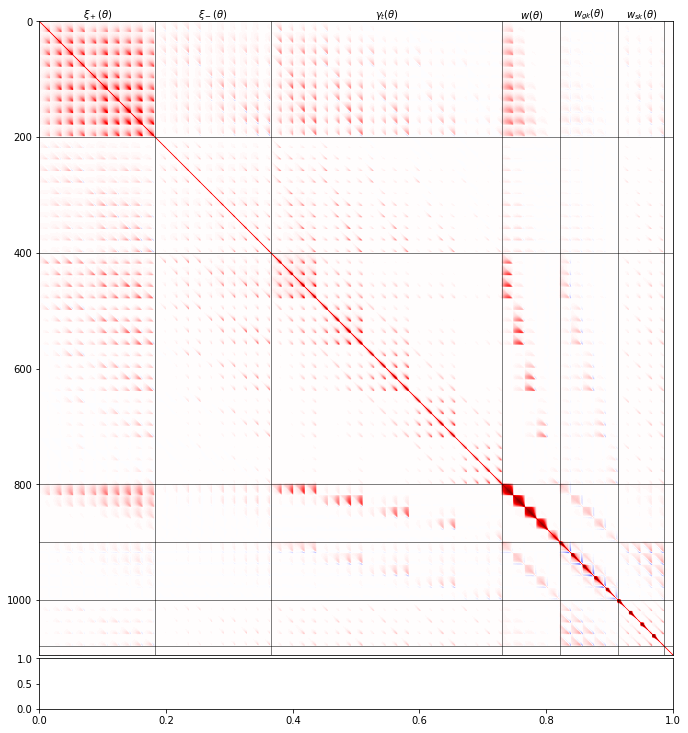

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.135, 0.125, 0.89, 0.88])
cb = ax.imshow(cors[0], origin="upper", cmap='seismic', 
           vmin=-1, vmax=1
          )
#plt.colorbar(cb, ax=ax)
print(ax.get_position())
subax = fig.add_axes([0.14, 0.05, 0.88, 0.07])
#ax = plt.gca()
print(ax.get_position())
print(subax.get_position())
# xi_+
ax.axvline(Nss/2-0.5, lw=0.5, color='k')
ax.axhline(Nss/2-0.5, lw=0.5, color='k')
# xi_-
ax.axvline(Nss-0.5, lw=0.5, color='k')
ax.axhline(Nss-0.5, lw=0.5, color='k')
# gs
ax.axvline(Nss+Ngs-0.5, lw=0.5, color='k')
ax.axhline(Nss+Ngs-0.5, lw=0.5, color='k')
# gg
ax.axvline(Nss+Ngs+Ngg-0.5, lw=0.5, color='k')
ax.axhline(Nss+Ngs+Ngg-0.5, lw=0.5, color='k')
# gk
ax.axvline(Nss+Ngs+Ngg+Ngk-0.5, lw=0.5, color='k')
ax.axhline(Nss+Ngs+Ngg+Ngk-0.5, lw=0.5, color='k')
# sk
ax.axvline(Nss+Ngs+Ngg+Ngk+Nsk-0.5, lw=0.5, color='k')
ax.axhline(Nss+Ngs+Ngg+Ngk+Nsk-0.5, lw=0.5, color='k')

ax.text(Nss/2/2, 0, r'$\xi_+(\theta)$', ha='center', va='bottom')
ax.text((Nss/2 + Nss)/2, 0, r'$\xi_-(\theta)$', ha='center', va='bottom')
ax.text((Nss + Nss+Ngs)/2, 0, r'$\gamma_t(\theta)$', ha='center', va='bottom')
ax.text((Nss+Ngs + Nss+Ngs+Ngg)/2, 0, r'$w(\theta)$', ha='center', va='bottom')
ax.text((Ndata_3x2pt + Ndata_3x2pt+Ngk)/2, 0, r'$w_{gk}(\theta)$', ha='center', va='bottom')
ax.text((Ndata_3x2pt+Ngk + Ndata_3x2pt+Ngk+Nsk)/2, 0, r'$w_{sk}(\theta)$', ha='center', va='bottom')
#ax.text((Ndata_3x2pt+Ngk+Nsk + Ndata_6x2pt)/2, -4, r'$C_{kk}(\ell)$', ha='center', va='bottom')
ax.set_xticks([])

show_datav_diff = False
if show_datav_diff:
    subax.scatter(range(Ndata_6x2pt)[Ndata_3x2pt:Ndata_6x2pt-Nkk], diff[Ndata_3x2pt:Ndata_6x2pt-Nkk], 
                   s=1, label='tSZcontm-tSZdeproj')
    subax.scatter(range(Ndata_6x2pt)[Ndata_3x2pt:Ndata_6x2pt-Nkk], diff_tSZref[Ndata_3x2pt:Ndata_6x2pt-Nkk], 
                  s=1, label='ref-tSZdeproj')
    subax.scatter(range(Ndata_6x2pt)[:Ndata_3x2pt], diff_treecorr[:Ndata_3x2pt], 
                  s=1, label='TreeCorr-Pub')
    subax.legend(loc='lower left')
    # xi_+
    subax.axvline(Nss/2-0.5, lw=0.5, color='k')
    # xi_-
    subax.axvline(Nss-0.5, lw=0.5, color='k')
    # gs
    subax.axvline(Nss+Ngs-0.5, lw=0.5, color='k')
    # gg
    subax.axvline(Nss+Ngs+Ngg-0.5, lw=0.5, color='k')
    # gk
    subax.axvline(Nss+Ngs+Ngg+Ngk-0.5, lw=0.5, color='k')
    # sk
    subax.axvline(Nss+Ngs+Ngg+Ngk+Nsk-0.5, lw=0.5, color='k')
    subax.set_xlim(ax.get_xlim())


plt.show()

# Covariance matrix inverse

In [44]:
invcov = LA.inv(cov)
a = np.sort(LA.eigvals(invcov[:,:]))
print("Eigenvalues range of the full invcov matrix: [{}, {}]".format(np.min(a), np.max(a)))
print("neg eigenvalues full invcov:")
for i in range(0,a.shape[0]):
    if (a[i]< 0.0): print(a[i])

Eigenvalues range of the full invcov matrix: [1248.2124107316033, 1.1977476304381718e+17]
neg eigenvalues full invcov:


# Check likelihood difference between data vectors

In [105]:
# 2pt functions output
twopt_dir = "/home/u17/jiachuanxu/CosmoLike/2pt_measurements/data_test"

# data vector angular mask file


# 3x2pt data vectors measured by TreeCorr
datav_gg = twopt_dir+'/gg_%d_%d.txt'
datav_gs = twopt_dir+'/ggl_S%d_L%d.txt'
datav_ss = twopt_dir+'/shear_%d_%d.txt'

# gk, sk data vectors measured from planck reference smoothed map
datav_gk_tSZref = twopt_dir+'/gk_smooth_%d.txt'
datav_sk_tSZref = twopt_dir+'/sk_smooth_%d.txt'

# gk, sk data vectors measured from planck tSZ-contaminated smoothed map
datav_gk_tSZcontm = twopt_dir+'/gk_SZctm_smooth_%d.txt'
datav_sk_tSZcontm = twopt_dir+'/sk_SZctm_smooth_%d.txt'

# gk, sk data vectors measured from planck tSZ-deprojected smoothed map
datav_gk_tSZdeproj = twopt_dir+'/gk_SZdeproj_smooth_%d.txt'
datav_sk_tSZdeproj = twopt_dir+'/sk_SZdeproj_smooth_%d.txt'

In [127]:
gk_mask = [
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          ]
sk_mask = [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
          ]
_DESY1_3x2pt_mask = np.genfromtxt("/home/u17/jiachuanxu/CosmoLike/2pt_meas"\
                                 "urements/data_test/xi_desy1_3x2pt_treecorr_test.mask")
DESY1_3x2pt_mask = np.zeros(Ndata)
DESY1_3x2pt_mask[:Ndata_3x2pt] = _DESY1_3x2pt_mask[:,1]

## 1. 6x2pt Data vector measured using Planck reference map and Planck tSZ-deprojected map

In [111]:
datav_tSZcontm = np.zeros(Ndata)
datav_tSZdeproj = np.zeros(Ndata)
start = int(Ntheta*( (Nsrc+1)*Nsrc/2 + (Nsrc+1)*Nsrc/2 + Nsrc*Nlens + Nlens))
print("CMB-related real-sapce datav starts at %d"%start)
# gk start
for i in range(Nlens):
    gk_tSZcontm = np.genfromtxt(datav_gk_tSZcontm%i, names=True)
    gk_tSZdeproj = np.genfromtxt(datav_gk_tSZdeproj%i, names=True)
    datav_tSZcontm[start:start+Ntheta] = gk_tSZcontm['xi'] * gk_mask[i]
    datav_tSZdeproj[start:start+Ntheta] = gk_tSZdeproj['xi'] * gk_mask[i]
    start += Ntheta
# sk start
for i in range(Nsrc):
    sk_tSZcontm = np.genfromtxt(datav_sk_tSZcontm%i, names=True)
    sk_tSZdeproj = np.genfromtxt(datav_sk_tSZdeproj%i, names=True)
    datav_tSZcontm[start:start+Ntheta] = sk_tSZcontm['xi'] * sk_mask[i]
    datav_tSZdeproj[start:start+Ntheta] = sk_tSZdeproj['xi'] * sk_mask[i]
    start += Ntheta
print("CMB-related real-sapce datav ends at %d"%start)
# calculate difference in likelihood
diff = datav_tSZcontm - datav_tSZdeproj
loglike_diff = -0.5*diff.T@invcov@diff
print("Difference in log(likelihood) between tSZ-contamintaed "\
      "and tSZ-deprojected gk+sk data vectors = {:.2f}".format(loglike_diff))
print("Difference in chi2 per dof between tSZ-contaminated and"\
      " tSZ-deprojected gk+sk data vectors >= {:.2f}".format(-2*loglike_diff/(Ngk+Nsk)))

CMB-related real-sapce datav starts at 900
CMB-related real-sapce datav ends at 1080
Difference in log(likelihood) between tSZ-contamintaed and tSZ-deprojected gk+sk data vectors = -426.76
Difference in chi2 per dof between tSZ-contaminated and tSZ-deprojected gk+sk data vectors >= 4.74


## 2. 3x2pt Data vector measured using TreeCorr code and the public data vector

In [128]:
datav_treecorr = np.zeros(Ndata)
datav_public = np.zeros(Ndata)
_datav_treecorr = np.genfromtxt("/home/u17/jiachuanxu/CosmoLike/DESxPlanck/datav/xi_Y1_3x2pt_treecorr_test")
_datav_public = np.genfromtxt("/home/u17/jiachuanxu/CosmoLike/DESxPlanck/datav/xi_Y1_3x2pt_public")
datav_treecorr[0:Ndata_3x2pt] = _datav_treecorr[:,1]
datav_public[0:Ndata_3x2pt] = _datav_public[:,1]
# calculate difference in likelihood
diff_treecorr = (datav_treecorr - datav_public)*DESY1_3x2pt_mask
loglike_diff = -0.5*diff_treecorr.T@invcov@diff_treecorr
print("Difference in log(likelihood) between TreeCorr "\
      "and Public 3x2pt data vectors = {:.2f}".format(loglike_diff))
print("Difference in chi2 per dof between TreeCorr and"\
      " public 3x2pt data vectors >= {:.2f}".format(-2*loglike_diff/(Ngk+Nsk)))

Difference in log(likelihood) between TreeCorr and Public 3x2pt data vectors = -2.42
Difference in chi2 per dof between TreeCorr and public 3x2pt data vectors >= 0.03


In [112]:
datav_tSZref = np.zeros(Ndata)
datav_tSZdeproj = np.zeros(Ndata)
start = int(Ntheta*( (Nsrc+1)*Nsrc/2 + (Nsrc+1)*Nsrc/2 + Nsrc*Nlens + Nlens))
print("CMB-related real-sapce datav starts at %d"%start)
# gk start
for i in range(Nlens):
    gk_tSZref = np.genfromtxt(datav_gk_tSZref%i, names=True)
    gk_tSZdeproj = np.genfromtxt(datav_gk_tSZdeproj%i, names=True)
    datav_tSZref[start:start+Ntheta] = gk_tSZref['xi'] * gk_mask[i]
    datav_tSZdeproj[start:start+Ntheta] = gk_tSZdeproj['xi'] * gk_mask[i]
    start += Ntheta
# sk start
for i in range(Nsrc):
    sk_tSZref = np.genfromtxt(datav_sk_tSZref%i, names=True)
    sk_tSZdeproj = np.genfromtxt(datav_sk_tSZdeproj%i, names=True)
    datav_tSZref[start:start+Ntheta] = sk_tSZref['xi'] * sk_mask[i]
    datav_tSZdeproj[start:start+Ntheta] = sk_tSZdeproj['xi'] * sk_mask[i]
    start += Ntheta
print("CMB-related real-sapce datav ends at %d"%start)
# calculate difference in likelihood
diff_tSZref = datav_tSZref - datav_tSZdeproj
loglike_diff = -0.5*diff_tSZref.T@invcov@diff_tSZref
print("Difference in log(likelihood) between reference "\
      "and tSZ-deprojected gk+sk data vectors = {:.2f}".format(loglike_diff))
print("Difference in chi2 per dof between reference and"\
      " tSZ-deprojected gk+sk data vectors >= {:.2f}".format(-2*loglike_diff/(Ngk+Nsk)))

CMB-related real-sapce datav starts at 900
CMB-related real-sapce datav ends at 1080
Difference in log(likelihood) between reference and tSZ-deprojected gk+sk data vectors = -559.73
Difference in chi2 per dof between reference and tSZ-deprojected gk+sk data vectors >= 6.22


In [ ]:
2.5-250 arcmin